In [1]:
#1) Importing libraries and dataset


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

df=pd.read_csv(r"/Users/niccolocomar/Documents/Kaggle/Korean demographics 2000-2022/Korean_demographics_2000-2022.csv")

In [2]:
#2) Exploratory dataset analysis, data cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 4860 non-null   object 
 1   Region               4860 non-null   object 
 2   Birth                4716 non-null   float64
 3   Birth_rate           4709 non-null   float64
 4   Death                4716 non-null   float64
 5   Death_rate           4709 non-null   float64
 6   Divorce              4716 non-null   float64
 7   Divorce_rate         4709 non-null   float64
 8   Marriage             4716 non-null   float64
 9   Marriage_rate        4709 non-null   float64
 10  Natural_growth       4716 non-null   float64
 11  Natural_growth_rate  4709 non-null   float64
dtypes: float64(10), object(2)
memory usage: 455.8+ KB


In [3]:
df.shape

(4860, 12)

In [4]:
df.dtypes

Date                    object
Region                  object
Birth                  float64
Birth_rate             float64
Death                  float64
Death_rate             float64
Divorce                float64
Divorce_rate           float64
Marriage               float64
Marriage_rate          float64
Natural_growth         float64
Natural_growth_rate    float64
dtype: object

In [5]:
df.describe().T

count         mean          std      min      25%  \
Birth                4716.0  4138.169635  8450.112413     67.0  1004.75   
Birth_rate           4709.0     8.737872     2.358128      3.1     7.21   
Death                4716.0  2556.818066  5029.234791     52.0   692.50   
Death_rate           4709.0     5.857528     1.589019      3.1     4.50   
Divorce              4716.0  1130.374894  2287.594278     10.0   278.00   
Divorce_rate         4709.0     2.351391     0.486523      0.8     2.00   
Marriage             4716.0  2786.632952  5784.566575     37.0   630.00   
Marriage_rate        4709.0     5.608452     1.458931      2.4     4.60   
Natural_growth       4716.0  1581.350085  4157.926276 -21562.0   105.75   
Natural_growth_rate  4709.0     2.880442     3.263017    -11.2     0.70   

                         50%      75%       max  
Birth                1431.50  2327.00  61644.00  
Birth_rate              8.83    10.07     18.77  
Death                1149.00  1721.00  44487.00  
Death_rate              5.60     7.00     15.70  
Divorce               392.00   651.25  15517.00  
Divorce_rate            2.30     2.60      5.00  
Marriage              908.50  1535.25  46099.00  
Marriage_rate           5.50     6.50     12.40  
Natural_growth        444.50   941.00  38286.00  
Natural_growth_rate     2.90     5.20     13.70

In [6]:
df.Region.unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [7]:
df.duplicated().sum()

0

In [8]:
df.isna().sum()

Date                     0
Region                   0
Birth                  144
Birth_rate             151
Death                  144
Death_rate             151
Divorce                144
Divorce_rate           151
Marriage               144
Marriage_rate          151
Natural_growth         144
Natural_growth_rate    151
dtype: int64

<AxesSubplot:>

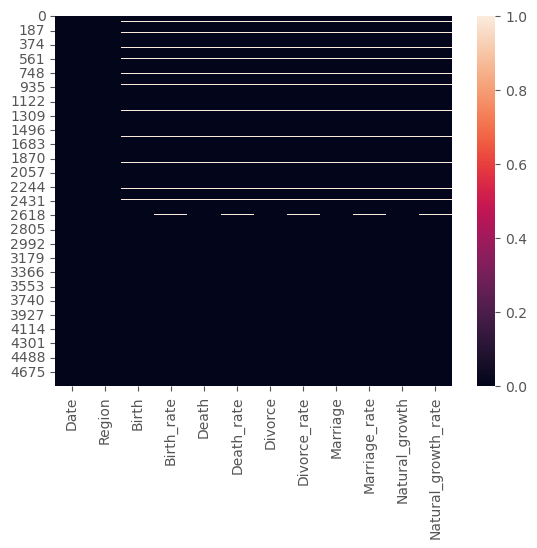

In [9]:
sns.heatmap(df.isnull())

In [10]:
dfnull = (df.isnull().sum()[df.isnull().sum()>0]).to_frame().rename(columns={0:"Number of Missing values"})
dfnull["% of Missing Values"] = round((100*df.isnull().sum()[df.isnull().sum()>0]/len(df)),2)
dfnull

Number of Missing values  % of Missing Values
Birth                                     144                 2.96
Birth_rate                                151                 3.11
Death                                     144                 2.96
Death_rate                                151                 3.11
Divorce                                   144                 2.96
Divorce_rate                              151                 3.11
Marriage                                  144                 2.96
Marriage_rate                             151                 3.11
Natural_growth                            144                 2.96
Natural_growth_rate                       151                 3.11

In [11]:
df = df.dropna()
df

Date             Region    Birth  Birth_rate    Death  Death_rate  \
0     1/1/2000              Busan   3752.0       11.61   1875.0         5.8   
1     1/1/2000  Chungcheongbuk-do   1903.0       15.06    924.0         7.3   
2     1/1/2000  Chungcheongnam-do   2398.0       14.75   1466.0         9.0   
3     1/1/2000              Daegu   3057.0       14.39   1117.0         5.3   
4     1/1/2000            Daejeon   1859.0       16.08    565.0         4.9   
...        ...                ...      ...         ...      ...         ...   
4855  6/1/2022       Jeollanam-do    565.0        3.80   1369.0         9.1   
4856  6/1/2022             Sejong    248.0        7.90    106.0         3.4   
4857  6/1/2022              Seoul   3137.0        4.10   3631.0         4.7   
4858  6/1/2022              Ulsan    443.0        4.80    434.0         4.7   
4859  6/1/2022      Whole country  18830.0        4.50  24850.0         5.9   

      Divorce  Divorce_rate  Marriage  Marriage_rate  Natural_growth  \
0       814.0           2.5    2435.0            7.5          1877.0   
1       220.0           1.7     828.0            6.6           979.0   
2       321.0           2.0    1055.0            6.5           932.0   
3       422.0           2.0    1577.0            7.4          1940.0   
4       280.0           2.4     868.0            7.5          1294.0   
...       ...           ...       ...            ...             ...   
4855    299.0           2.0     479.0            3.2          -805.0   
4856     43.0           1.4     123.0            3.9           141.0   
4857   1088.0           1.4    2630.0            3.4          -494.0   
4858    154.0           1.7     316.0            3.5             9.0   
4859   7586.0           1.8   14898.0            3.5         -6019.0   

      Natural_growth_rate  
0                     5.8  
1                     7.7  
2                     5.7  
3                     9.1  
4                    11.2  
...                   ...  
4855                 -5.4  
4856                  4.5  
4857                 -0.6  
4858                  0.1  
4859                 -1.4  

[4709 rows x 12 columns]

<AxesSubplot:>

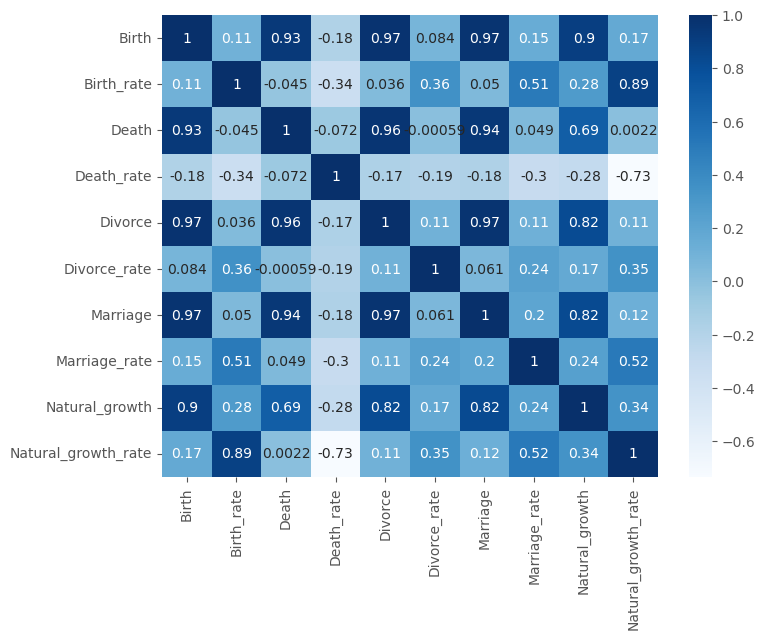

In [12]:
#3) Dataset correlation 

df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap="Blues", annot=True)

In [13]:
#Very high correlation (>0.90) of Birth with Death/Divorce/Marriage/Natural_growth
#Interestingly, Birth_rate isn't much correlated to Birth. Still, it's significantly correlated (0.51) with Marriage_rate.
#Natural_growth_rate is correlated with Marriage_rate (0.52), and in a lesser extent to Divorce_rate (0.35).
#We can spot already that Birth_rate depends a lot on Marriage_rate, and less on Divorce_rate.

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(1, 0, 'Birth'),
  Text(2, 0, 'Birth_rate'),
  Text(3, 0, 'Death'),
  Text(4, 0, 'Death_rate'),
  Text(5, 0, 'Divorce'),
  Text(6, 0, 'Divorce_rate'),
  Text(7, 0, 'Marriage'),
  Text(8, 0, 'Marriage_rate'),
  Text(9, 0, 'Natural_growth'),
  Text(10, 0, 'Natural_growth_rate')])

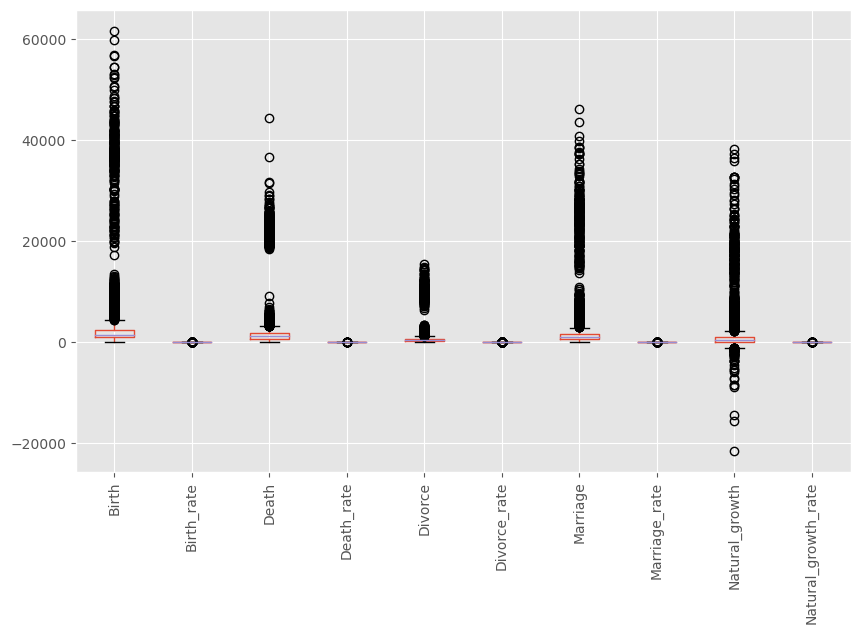

In [14]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.xticks(rotation=90)

([<matplotlib.axis.XTick at 0x7f9b81b01400>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

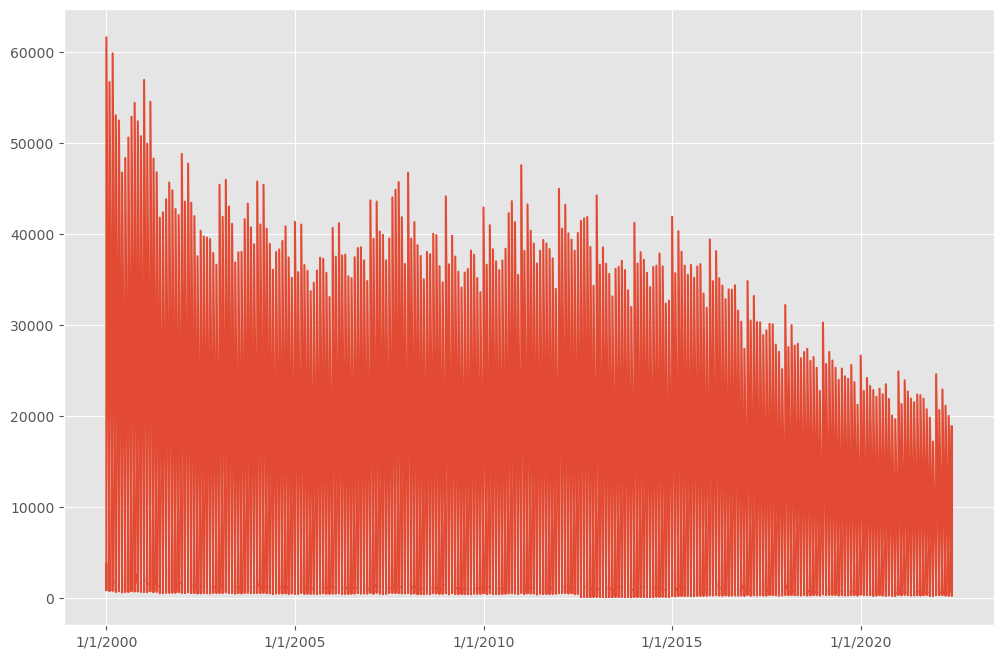

In [15]:
#4) Data Analysis

#4a) Births, Deaths, Natural Growth

plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Birth)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Births in South Korea have been decreasing during 2000-2022.

([<matplotlib.axis.XTick at 0x7f9b6062f7f0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

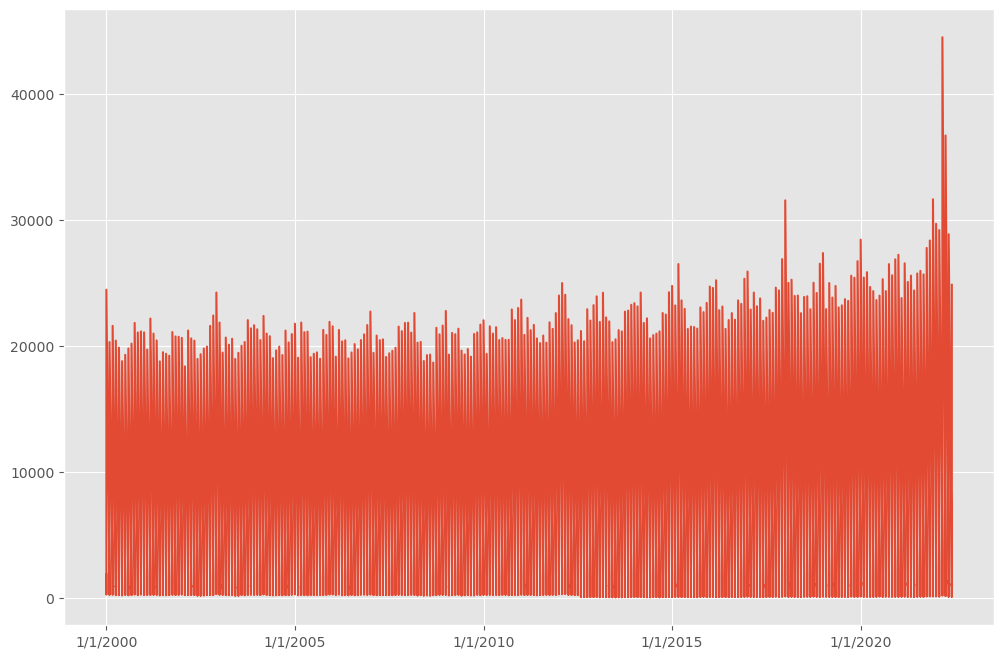

In [16]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Death)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Deaths is South Korea have been slowly increasing. There is a spike (44487 deaths) occured on 03/01/2022

In [17]:
df.loc[df["Death"].idxmax()]

Date                        3/1/2022
Region                 Whole country
Birth                        22925.0
Birth_rate                       5.3
Death                        44487.0
Death_rate                      10.2
Divorce                       7882.0
Divorce_rate                     1.8
Marriage                     15316.0
Marriage_rate                    3.5
Natural_growth              -21562.0
Natural_growth_rate             -4.9
Name: 4805, dtype: object

([<matplotlib.axis.XTick at 0x7f9b82726af0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

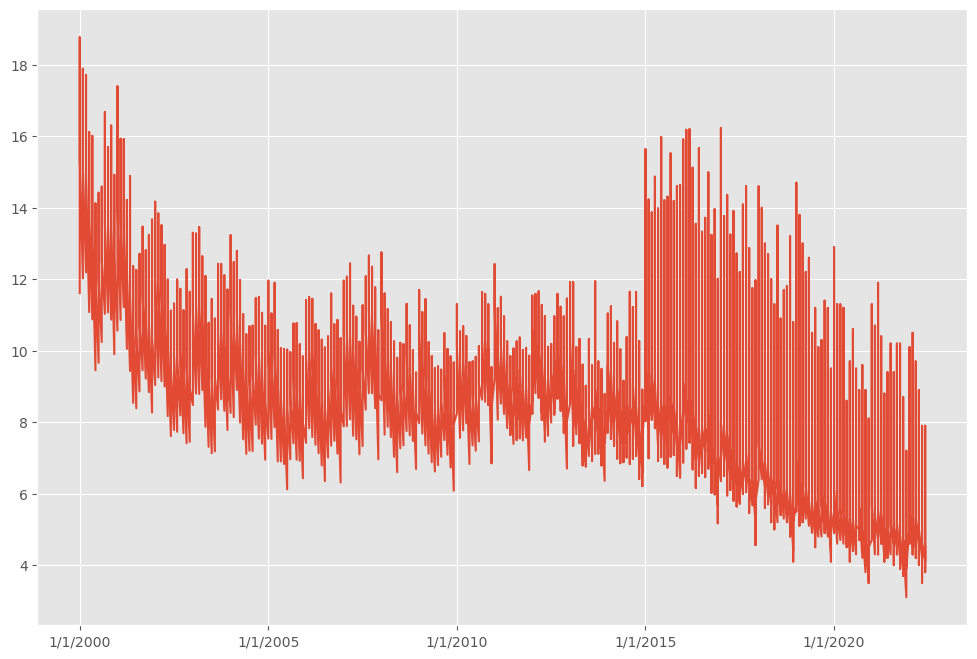

In [18]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Birth_rate)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Birth rate in South Korea decreases in time

([<matplotlib.axis.XTick at 0x7f9b51d522e0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

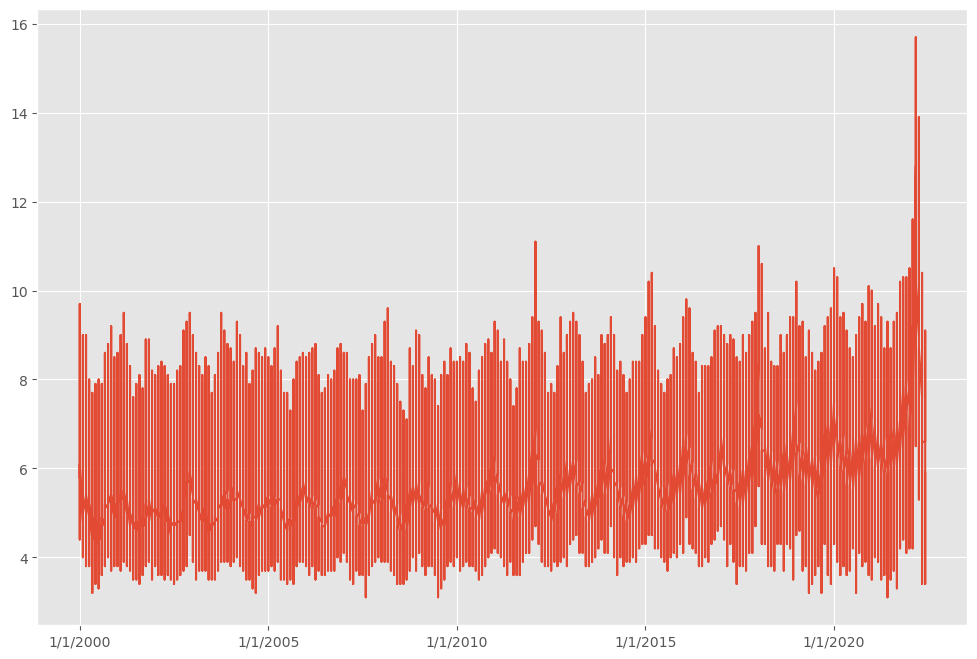

In [19]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Death_rate)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Death rate slowly increasing during the timeframe

([<matplotlib.axis.XTick at 0x7f9b51c54730>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

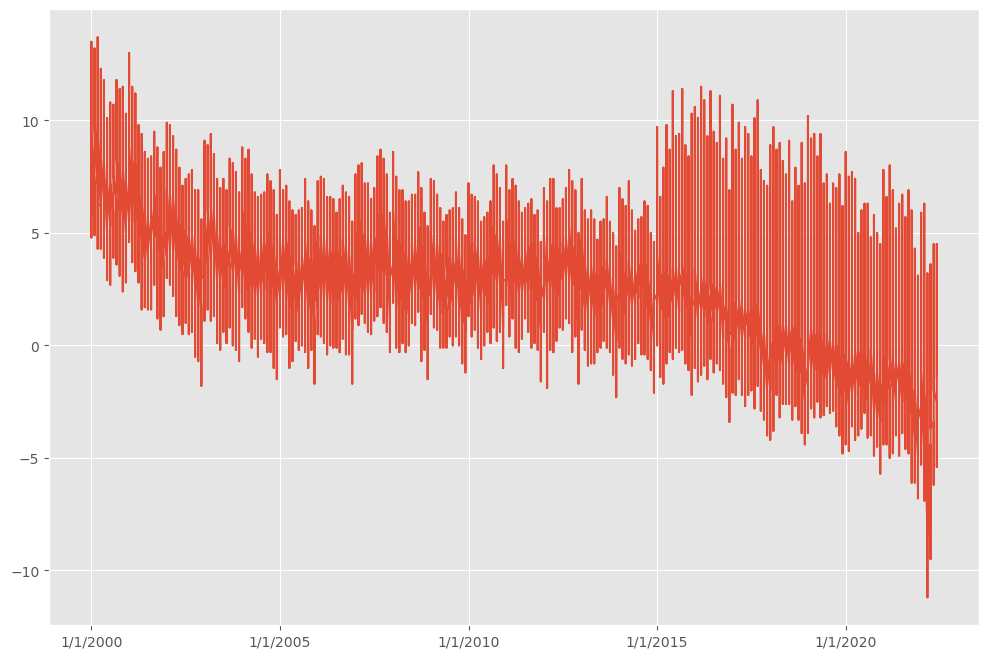

In [20]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Natural_growth_rate)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#From around 2020, South Korea natural growth rate goes below 0 (decrease in population)

([<matplotlib.axis.XTick at 0x7f9b60bc2dc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

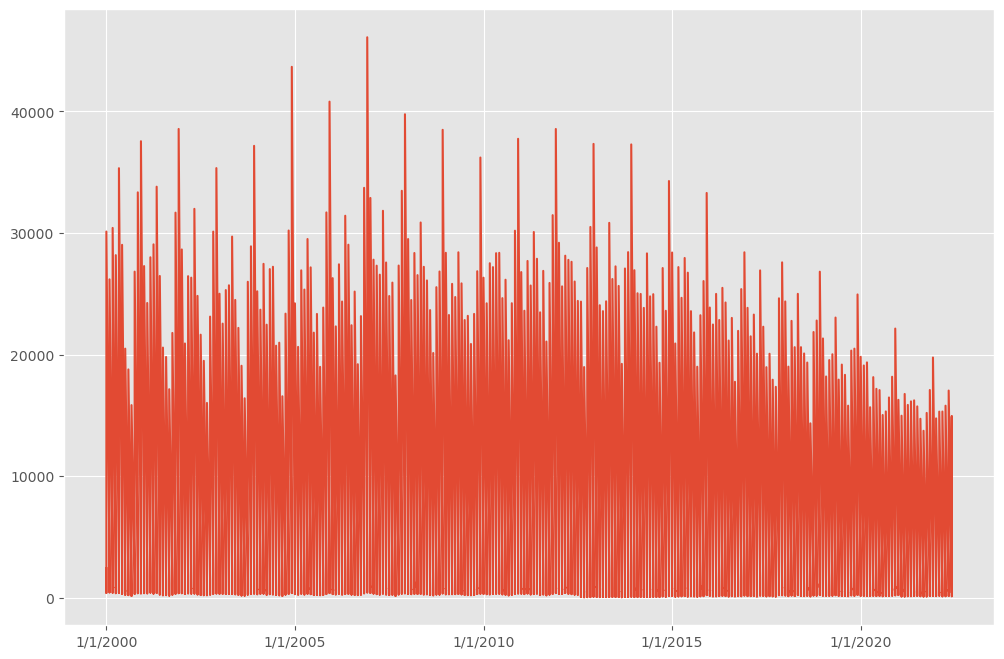

In [21]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Marriage)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Trend of South Korean Marriages, decreasing especially from 2015 onwards

([<matplotlib.axis.XTick at 0x7f9b530180d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

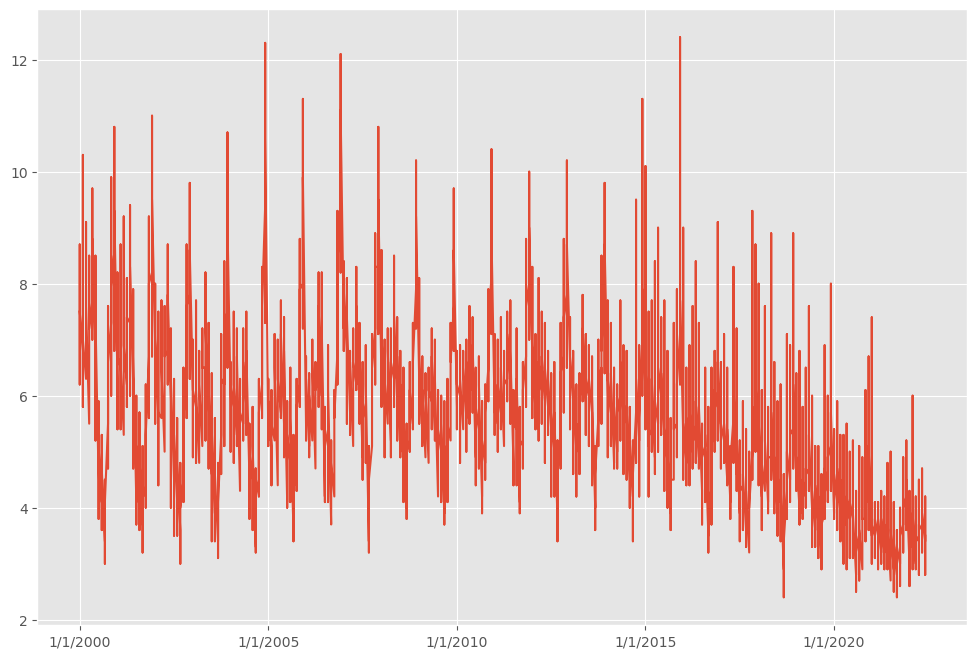

In [22]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Marriage_rate)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#From around 2015, South Korean Marriage rate decreases steadily

([<matplotlib.axis.XTick at 0x7f9b82f57c10>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

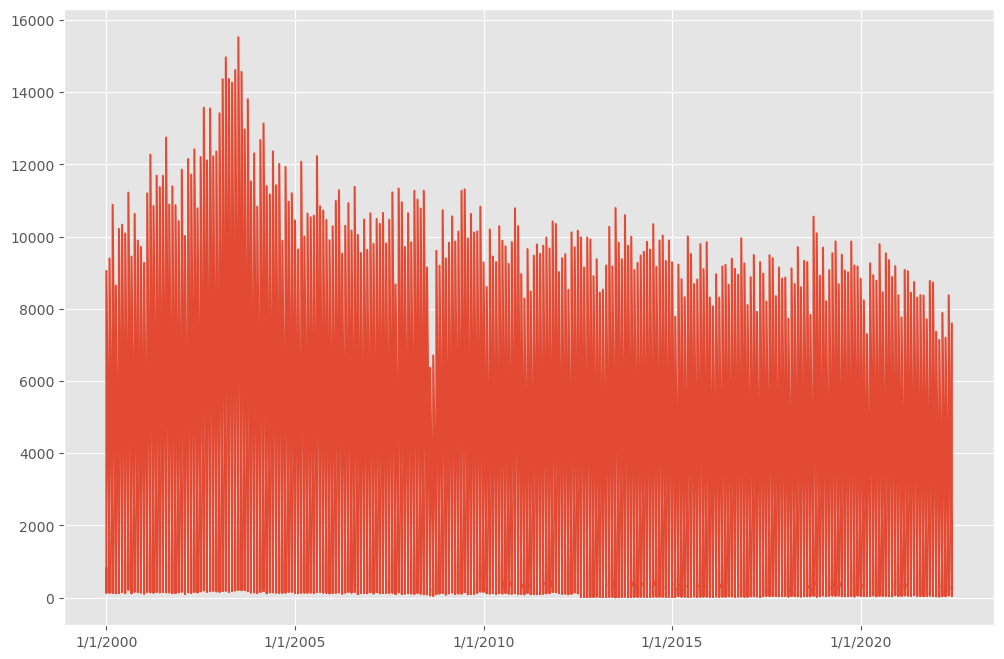

In [23]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Divorce)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#Trend of South Korean Marriages. There is a peak at around 2003, and a dip at around 2009 (not the lowest Divorce value - that is from 07/01/2013). Still, they tend to decrease

In [24]:
df.loc[df["Divorce"].idxmax()]

Date                        7/1/2003
Region                 Whole country
Birth                        38008.0
Birth_rate                      9.26
Death                        19446.0
Death_rate                       4.7
Divorce                      15517.0
Divorce_rate                     3.8
Marriage                     22196.0
Marriage_rate                    5.4
Natural_growth               18562.0
Natural_growth_rate              4.5
Name: 773, dtype: object

In [25]:
df.loc[df["Divorce"].idxmin()]

Date                   7/1/2013
Region                   Sejong
Birth                     102.0
Birth_rate                10.33
Death                      55.0
Death_rate                  5.6
Divorce                    10.0
Divorce_rate                1.0
Marriage                   60.0
Marriage_rate               6.1
Natural_growth             47.0
Natural_growth_rate         4.8
Name: 2930, dtype: object

([<matplotlib.axis.XTick at 0x7f9b72e330a0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

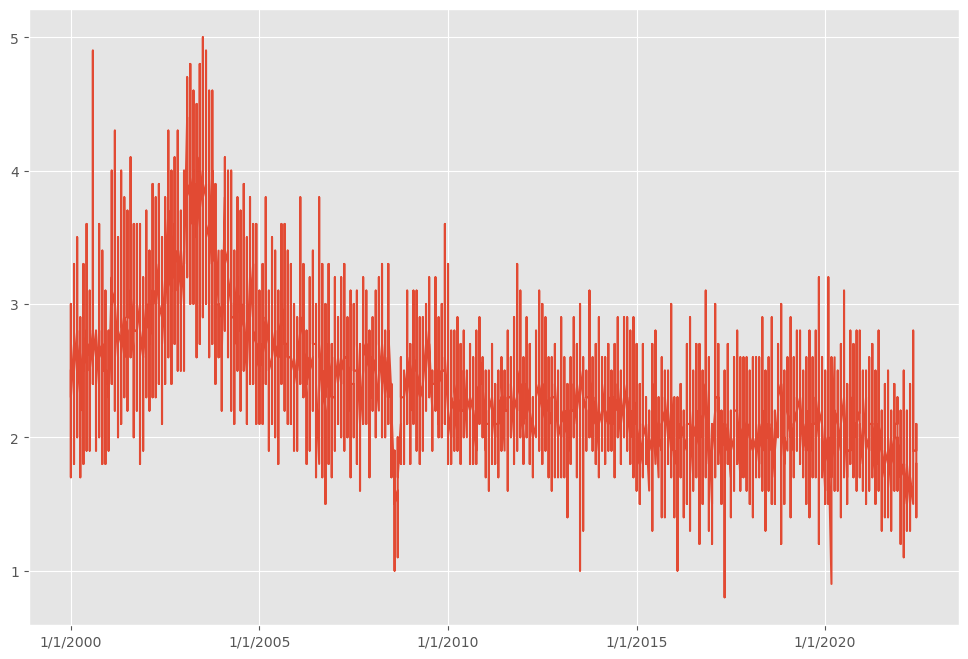

In [26]:
plt.figure(figsize=(12,8))
plt.plot(df.Date, df.Divorce_rate)
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])

#From around 2015, South Korean Marriage rate decreases steadily

In [27]:
#4c) South Korea whole country (SK) analysis 
#Let’s now isolate the aggregate data for South Korea. We are proceeding to create a new data frame called ‘countrywide’ by extracting the ‘Whole country’ entries (270) from the ‘Region’ column. We will then plot births (blue line), deaths (orange line) and the natural growth (births-deaths) below

sk = df[df.Region == 'Whole country'].copy()
sk.shape

(270, 12)

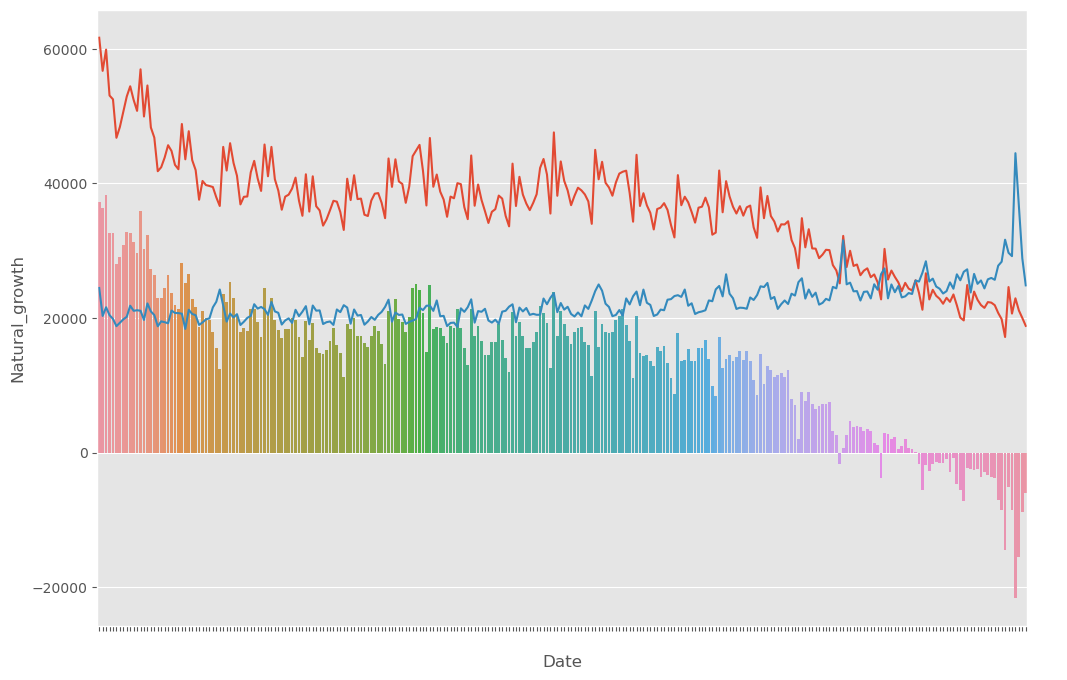

In [28]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sk, x='Date', y='Birth')
sns.lineplot(data=sk, x='Date', y='Death')
sns.barplot(data=sk, x='Date', y='Natural_growth')

plt.xticks(color='w')
plt.show()

#Nationwide, births outgrow deaths until roughly 2020, when natural growth becomes negative

In [29]:
#For the next steps, we need plotline in order to use ggplot. We will also install warnings (in order to suppress various deprecation warnings from plotnine and keep our notebook cleaner):


!pip install pandas plotnine
import warnings
warnings.filterwarnings('ignore')
from plotnine import *

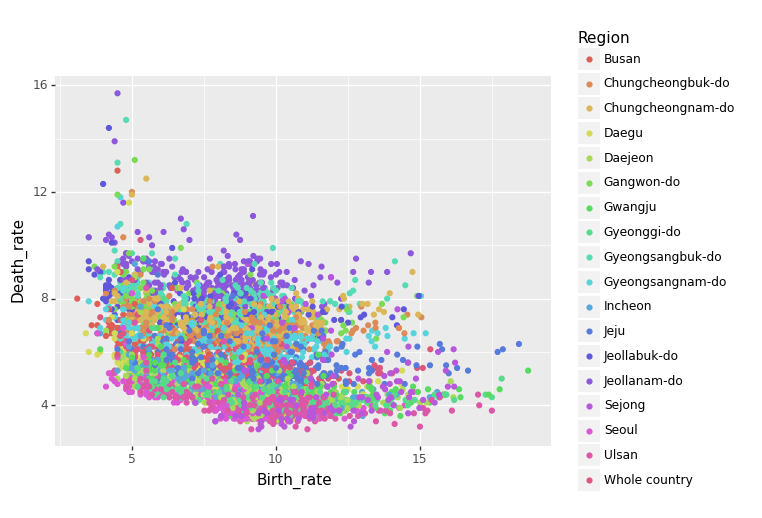

<ggplot: (8769120327644)>

In [30]:
#5) Analysis on Births/Deaths per region

ggplot(df, aes(x='Birth_rate', y='Death_rate')) + geom_point(aes(color='Region'))

#Higher death rates in the purple districts. Green dotted districts show high birth rates

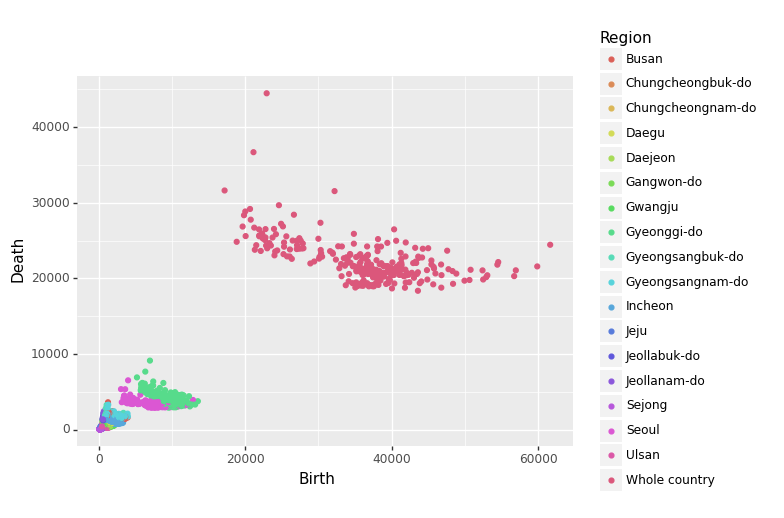

<ggplot: (8769083641588)>

In [31]:
ggplot(df, aes(x='Birth', y='Death')) + geom_point(aes(color='Region'))

#Most birth and deaths in the richer, more advanced Busan/Seoul area.

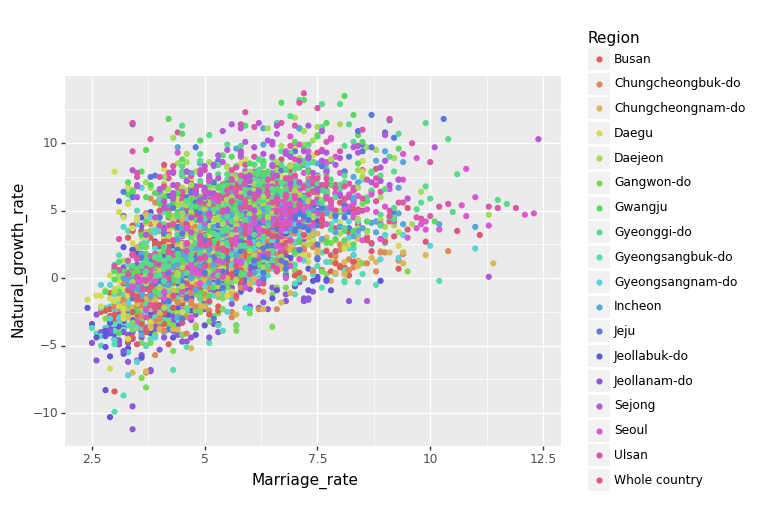

<ggplot: (8769120342501)>

In [32]:
# 6) Analysis on Marriage Rate and Natural Growth Rate

ggplot(df, aes(x='Marriage_rate', y='Natural_growth_rate')) + geom_point(aes(color= 'Region'))

<Figure size 200x300 with 0 Axes>

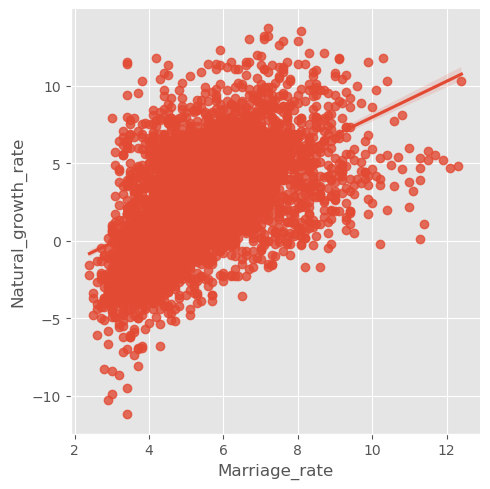

<Figure size 200x300 with 0 Axes>

In [33]:
sns.lmplot(data=df, x="Marriage_rate", y="Natural_growth_rate")
plt.figure(figsize=(2,3))

#Good correlation (0.52) between Marriage_rate and Natural_growth_rate. As we saw before, marriages in South Korea decline, and so does natural growth rate s w

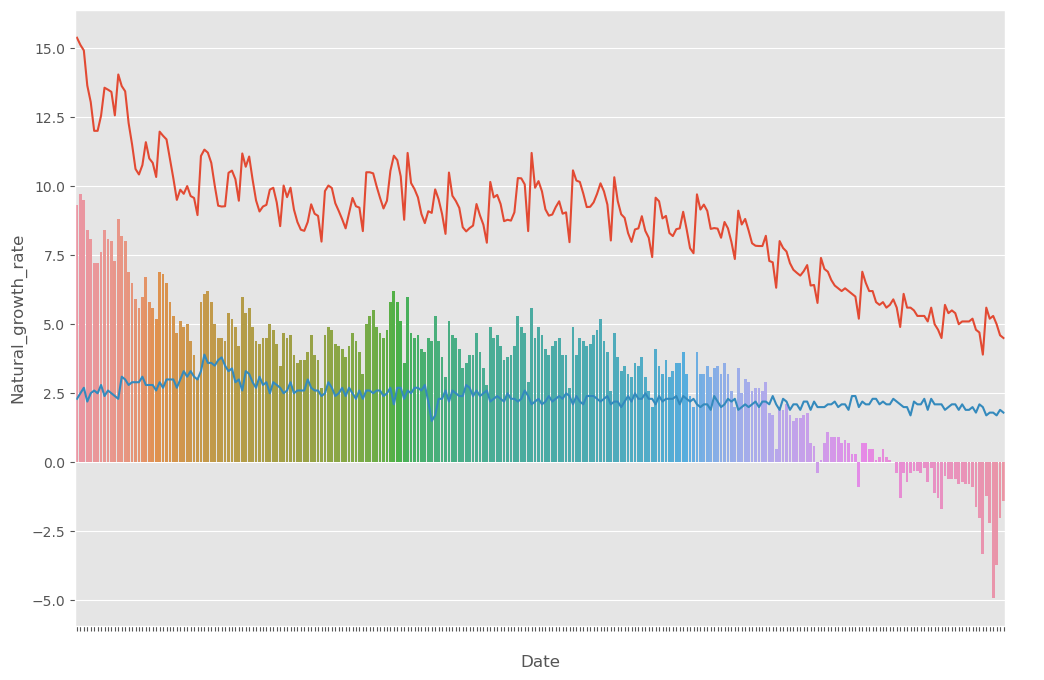

In [34]:
# 7) Effect of divorce and marriages in South Korea natality


plt.figure(figsize=(12,8))

sns.lineplot(data=sk, x='Date', y='Birth_rate')
sns.lineplot(data=sk, x='Date', y='Divorce_rate')
sns.barplot(data=sk, x='Date', y='Natural_growth_rate')

plt.xticks(color='w')
plt.show()

#It looks like divorce rate (orange line) seems steady, maybe in very slight decline during the 2000-2022 timeframe. So we can assume divorce isn’t a major contributor to the decline in natural growth rate.

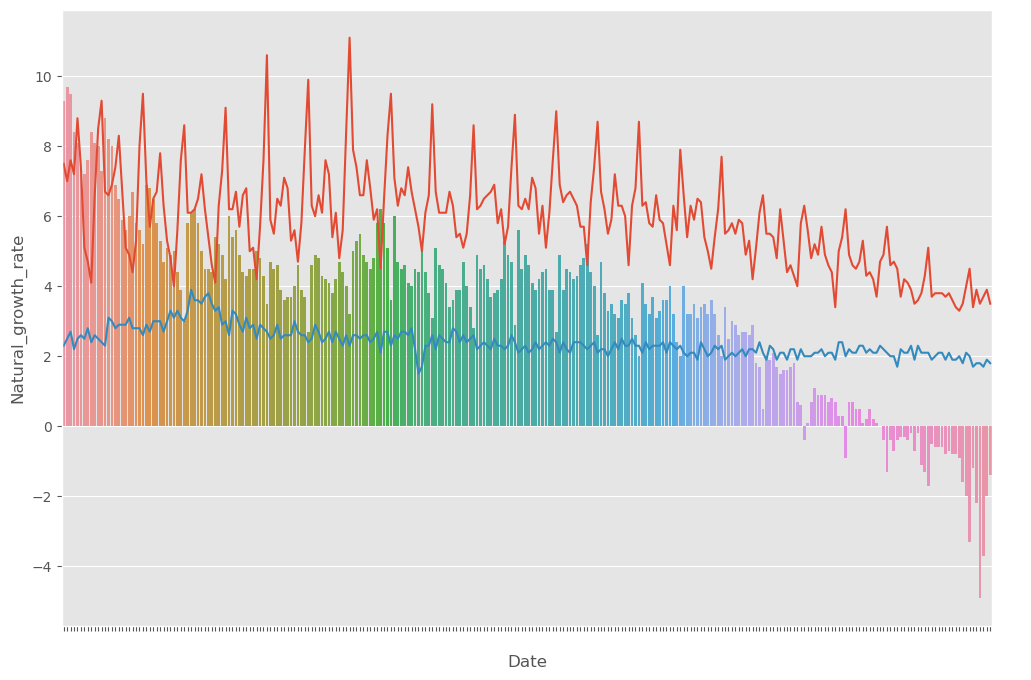

In [35]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sk, x='Date', y='Marriage_rate')
sns.lineplot(data=sk, x='Date', y='Divorce_rate')
sns.barplot(data=sk, x='Date', y='Natural_growth_rate')

plt.xticks(color='w')
plt.show()
           
#Rather than divorces, marriages occur less and less, so possibly they may affect more the decline in births          

<Figure size 100x2000 with 0 Axes>

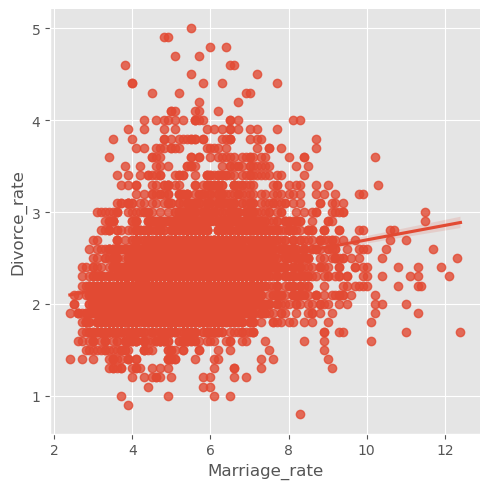

<Figure size 100x2000 with 0 Axes>

In [36]:
sns.lmplot(data=df, x="Marriage_rate", y="Divorce_rate")
plt.figure(figsize=(1,20))

#Slight (0.26) positive correlation between marriage and divorce rate. This could explain the fact that, lesser marriages during our timeframe, also people divorces less

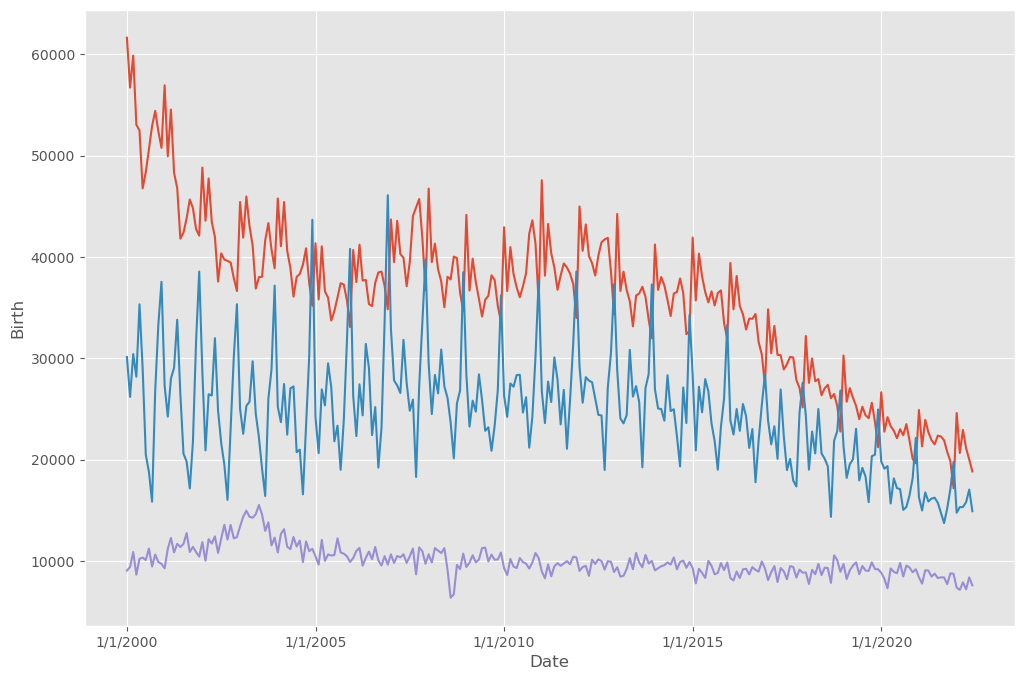

In [38]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sk, x='Date', y='Birth')
sns.lineplot(data=sk, x='Date', y='Marriage')
sns.lineplot(data=sk, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#South Korea nationwide decline in births more linked to less marriages happening than divorces.

In [ ]:
# 8) Let’s now check data on various areas of South Korea to confirm nationwide demographic trends:

In [39]:
#Seoul (capital city, most populated city of South Korea)

seoul = df[df.Region == 'Seoul'].copy()
seoul.shape

(270, 12)

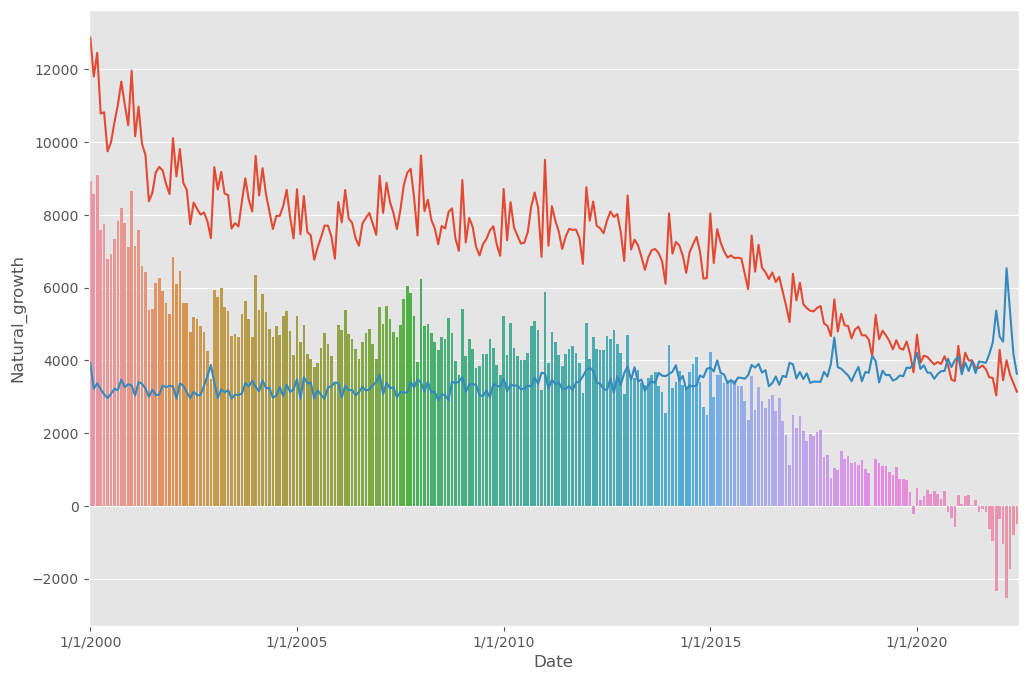

In [40]:
plt.figure(figsize=(12,8))

sns.lineplot(data=seoul, x='Date', y='Birth')
sns.lineplot(data=seoul, x='Date', y='Death')
sns.barplot(data=seoul, x='Date', y='Natural_growth')

plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#Spike in deaths early 2022 as nationwide, but less prominent. Decline in births, but less dramatic in the latter years

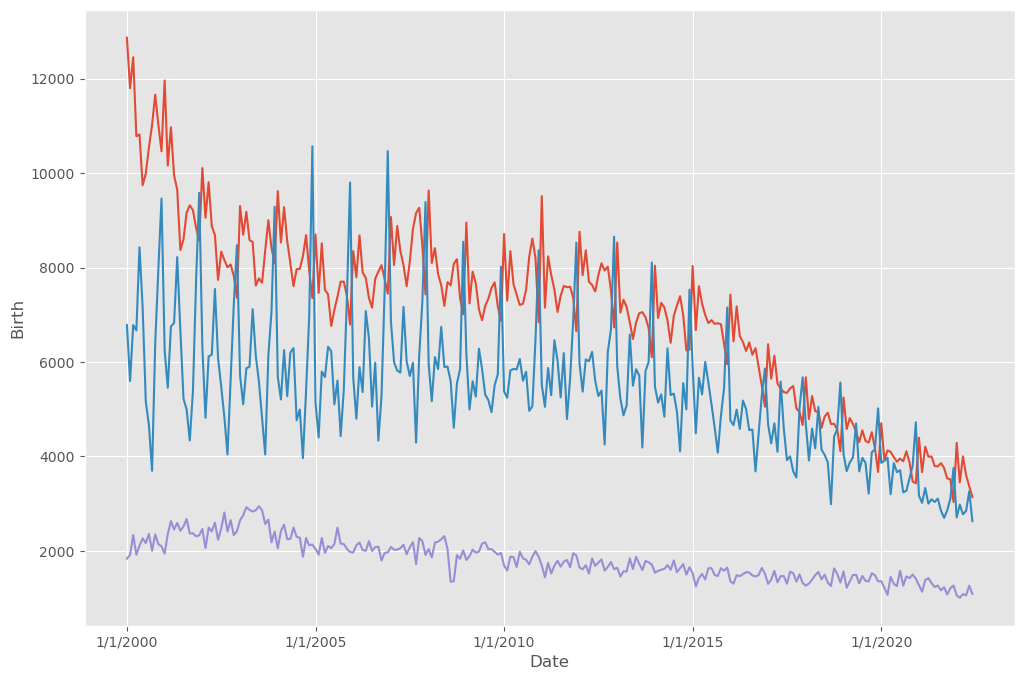

In [41]:
plt.figure(figsize=(12,8))

sns.lineplot(data=seoul, x='Date', y='Birth')
sns.lineplot(data=seoul, x='Date', y='Marriage')
sns.lineplot(data=seoul, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()
         
#In Seoul births decline as steep as marriages. Still, less divorces.

In [42]:
#Busan (second most populated city of South Korea)


busan = df[df.Region == 'Busan'].copy()
busan.shape 

(270, 12)

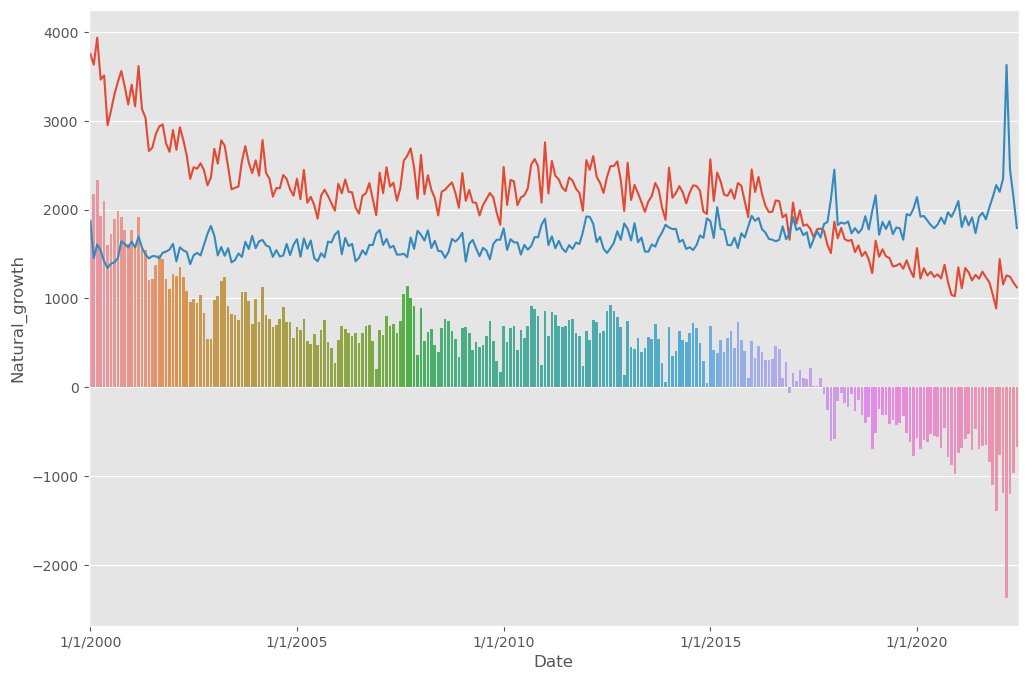

In [43]:
plt.figure(figsize=(12,8))

sns.lineplot(data=busan, x='Date', y='Birth')
sns.lineplot(data=busan, x='Date', y='Death')
sns.barplot(data=busan, x='Date', y='Natural_growth')

plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#In Busan, the early 2022 spike in deaths is similar to what traced nationwide. Anyway, deaths outscore births a few years before compared to Seoul. Decline in births is similar to what happens in the rest of the country and Seoul as well.

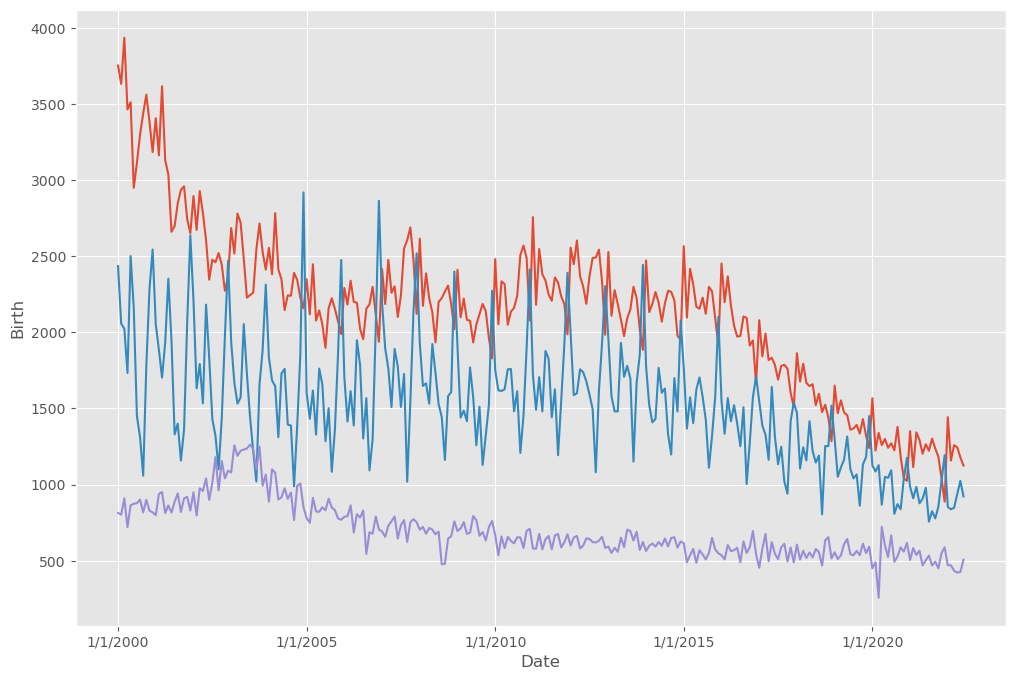

In [44]:
plt.figure(figsize=(12,8))

sns.lineplot(data=busan, x='Date', y='Birth')
sns.lineplot(data=busan, x='Date', y='Marriage')
sns.lineplot(data=busan, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#Again, similar trends in Busan regarding marriages and divorces (maybe less ‘steep’ then Seoul).

In [45]:
#Jeollanam-do and Jeollabuk-do, as we saw earlier, seem to have higher death rates. Let’s check them.

#Jeollanam-do

jeollanam = df[df.Region == 'Jeollanam-do'].copy()
jeollanam.shape

(270, 12)

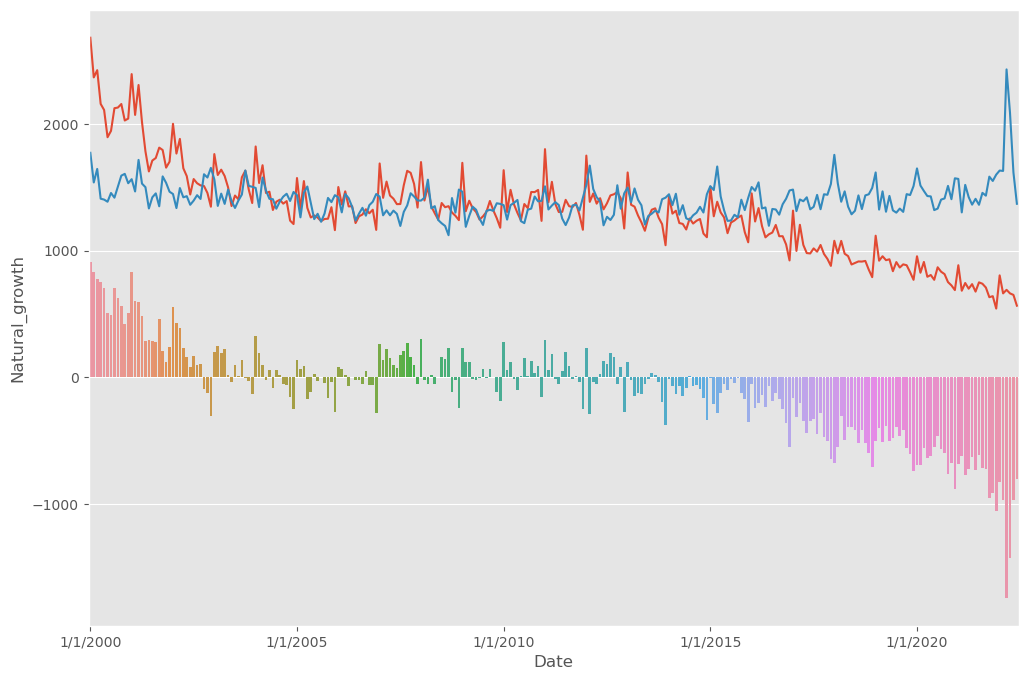

In [46]:
plt.figure(figsize=(12,8))

sns.lineplot(data=jeollanam, x='Date', y='Birth')
sns.lineplot(data=jeollanam, x='Date', y='Death')
sns.barplot(data=jeollanam, x='Date', y='Natural_growth')

plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#In Jeollanam we can see that around 2010 births start to get outgrown by deaths. In this area we can see that natural growth negative trend here started around 2013, when nationwide around 2020.

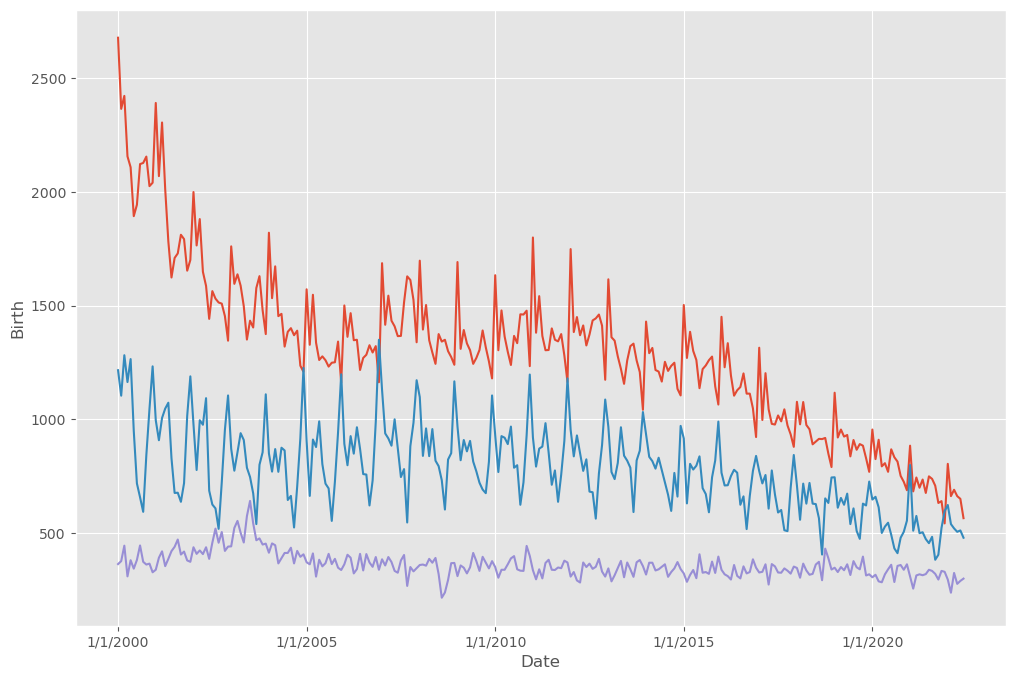

In [47]:
plt.figure(figsize=(12,8))

sns.lineplot(data=jeollanam, x='Date', y='Birth')
sns.lineplot(data=jeollanam, x='Date', y='Marriage')
sns.lineplot(data=jeollanam, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#In Jeollanam we see the drastic decline in births, even though the marriages reduce way less steeper than Seoul/Busan/nationwide. Divorces in decrease as well. Maybe it’s a rural part of the country, where people maybe leave for the big city

In [48]:
#Jeollabuk-do

jeollabuk = df[df.Region == 'Jeollabuk-do'].copy()
jeollabuk.shape 

(270, 12)

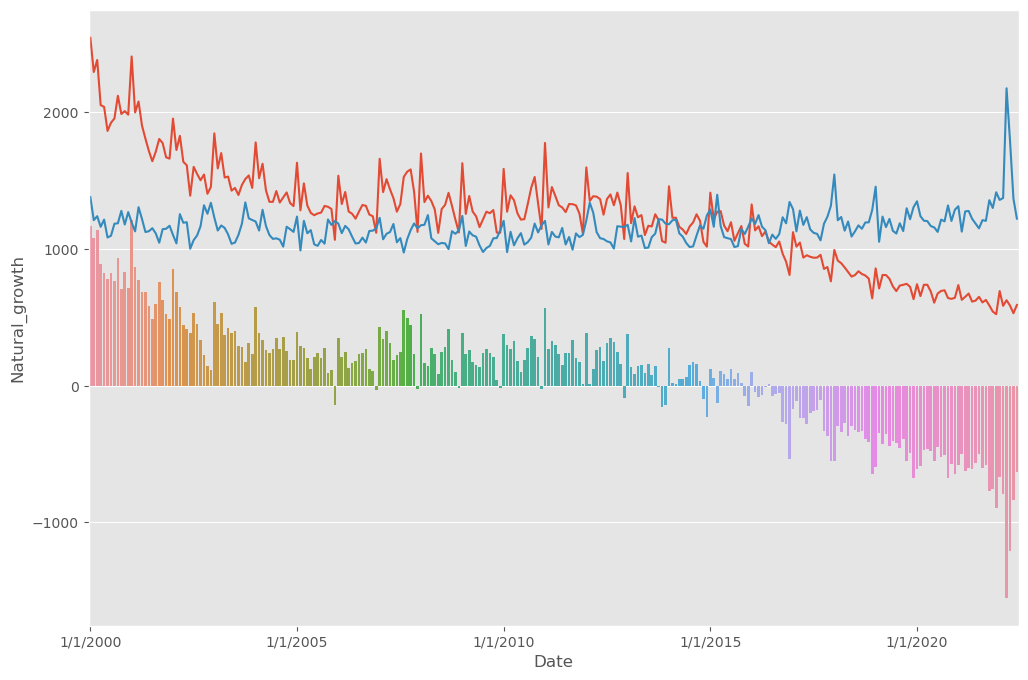

In [49]:
plt.figure(figsize=(12,8))

sns.lineplot(data=jeollabuk, x='Date', y='Birth')
sns.lineplot(data=jeollabuk, x='Date', y='Death')
sns.barplot(data=jeollabuk, x='Date', y='Natural_growth')

plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#Almost similar trends as in Jeollanam regarding births, deaths and natural growth. The main difference is that in Jeollabuk-do natural growth decline before 2013 wasn't as in Jeollanam-do

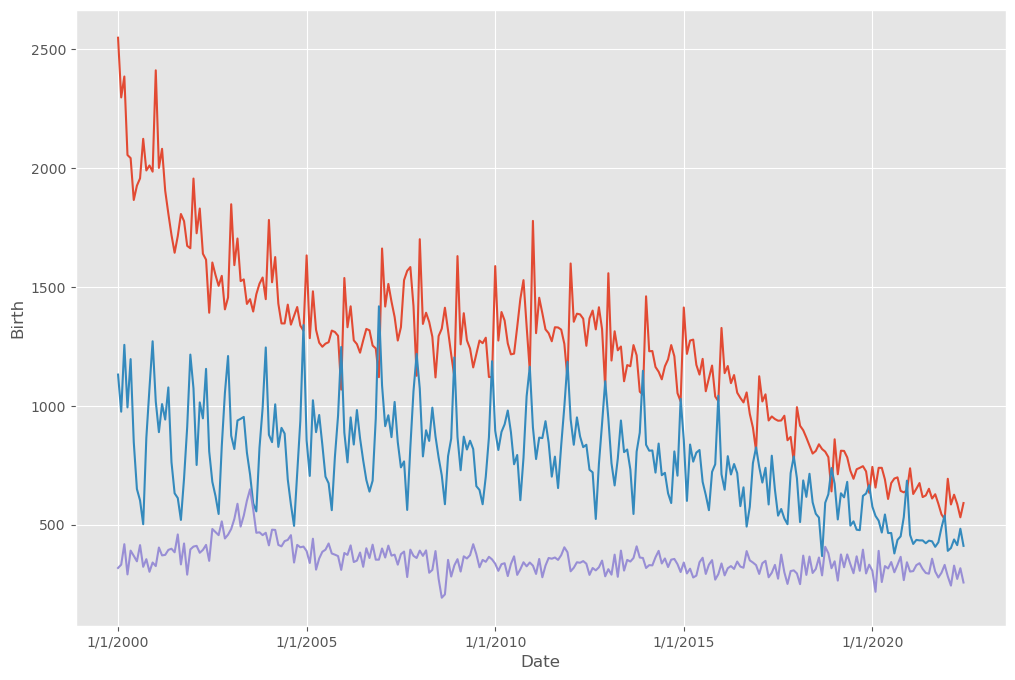

In [50]:
plt.figure(figsize=(12,8))

sns.lineplot(data=jeollabuk, x='Date', y='Birth')
sns.lineplot(data=jeollabuk, x='Date', y='Marriage')
sns.lineplot(data=jeollabuk, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#Again, similar trends as in Jeollanam regarding declining births, marriages and divorces.

In [51]:
#Sejong city

sejong = df[df.Region == 'Sejong'].copy()
sejong.shape 

(119, 12)

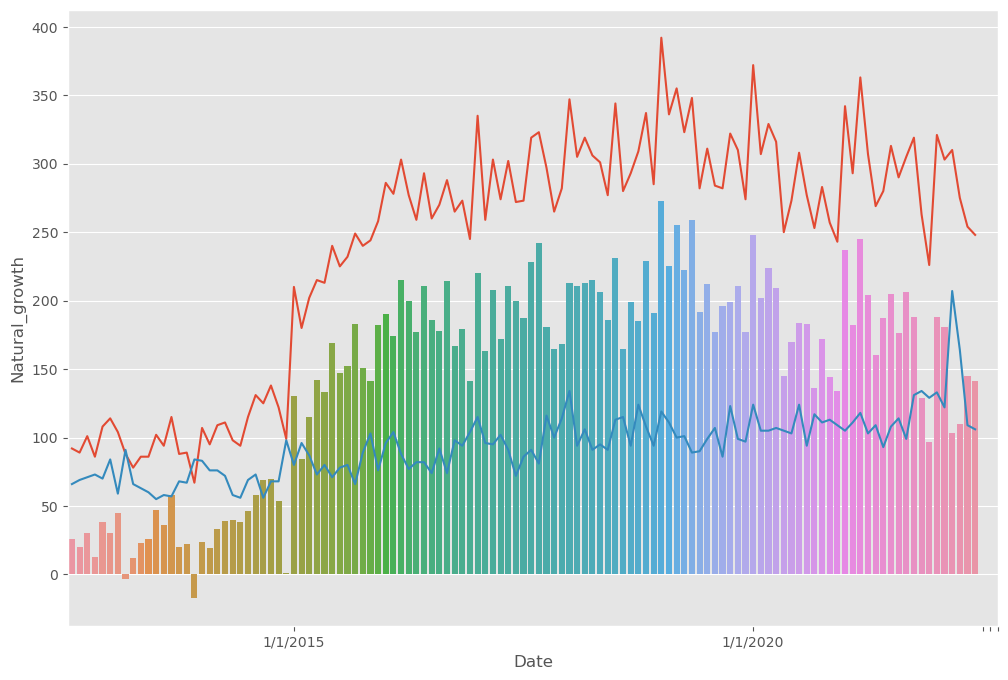

In [52]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sejong, x='Date', y='Birth')
sns.lineplot(data=sejong, x='Date', y='Death')
sns.barplot(data=sejong, x='Date', y='Natural_growth')

plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#We only have entries for Sejong from roughly 2013. Still, births are surprisingly outgrowing deaths. Maybe birth rise have plateaued around early 2020, when deaths still grew.
#This is because Sejong is a new, planned city and people are going to live there more and more because of job opportunities.

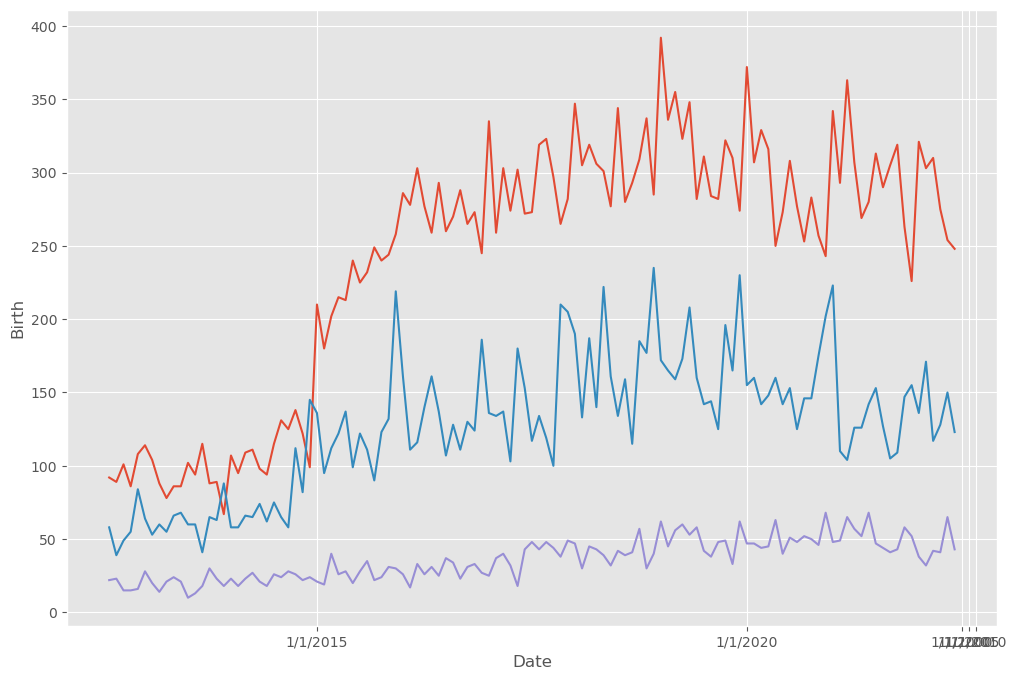

In [53]:
plt.figure(figsize=(12,8))

sns.lineplot(data=sejong, x='Date', y='Birth')
sns.lineplot(data=sejong, x='Date', y='Marriage')
sns.lineplot(data=sejong, x='Date', y='Divorce')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')
plt.show()

#As seen above, in Sejong births rose up in contrast with what happens elsewhere in South Korea, even though the growth is on decline since early 2020. Marriages have been steadily growing, and divorces as well.

In [54]:
# 9)Regional birth rate per region in South Korea, on 01/01/2022

import plotly.express as px

filter_date = df.loc[df['Date'] == '1/1/2022']
filter_Birth = filter_date.Birth[: -1]
filter_region = filter_date.Region[:-1]

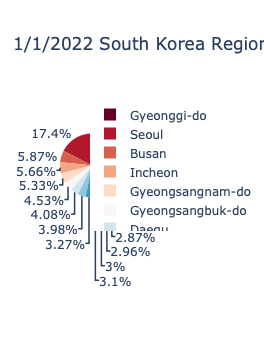

In [55]:
fig = px.pie(values=filter_Birth,
             names=filter_region,
             color_discrete_sequence=px.colors.sequential.RdBu,
             title= '1/1/2022 South Korea Regional Birth Rate Pie Chart')

fig.show()

Text(0, 0.5, 'Birth_rate')

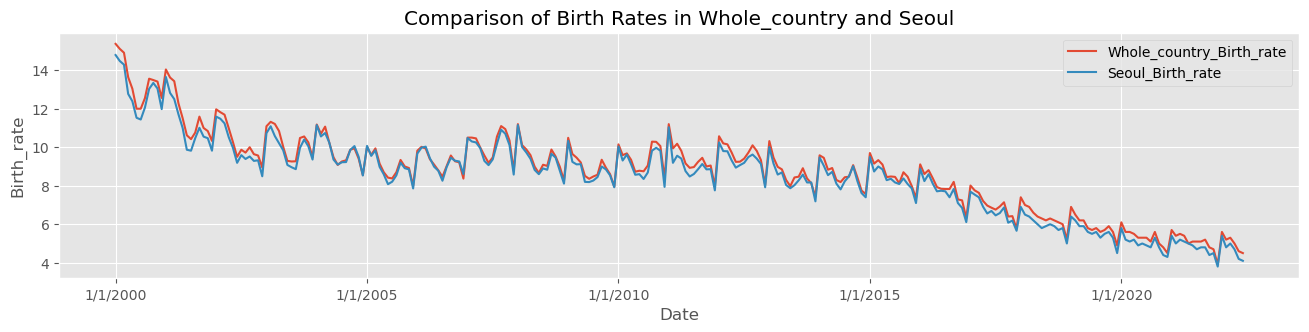

In [56]:
#10) Comparison between South Korea (nationwide 'sk' subset) and Seoul, Busan and Sejong

#SK VS Seoul

plt.figure(figsize=(16,7))

plt.subplot(2, 1, 1)
plt.ticklabel_format(useOffset=False, style='plain')

sns.lineplot(data=sk, x='Date', y='Birth_rate' ,label='Whole_country_Birth_rate')
sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Birth_rate' ,label='Seoul_Birth_rate')
plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.title('Comparison of Birth Rates in Whole_country and Seoul')
plt.ylabel('Birth_rate')

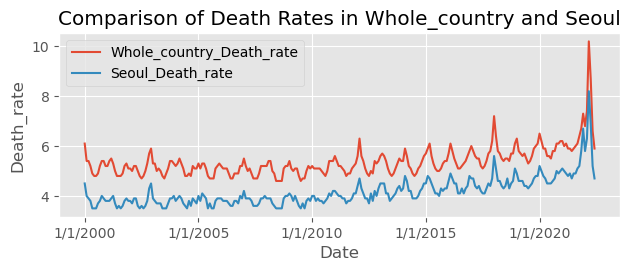

In [57]:
plt.subplot(2, 1, 2)

sns.lineplot(data=sk, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Death_rate', label='Seoul_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and Seoul')
plt.ylabel('Death_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

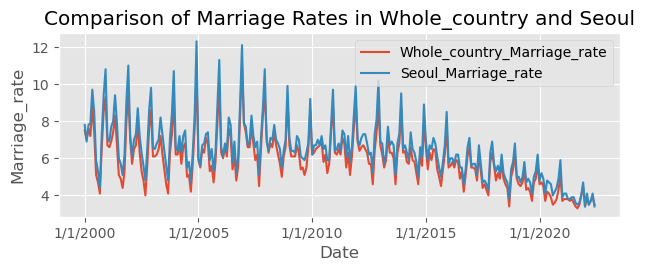

In [58]:
plt.subplot(2, 1, 2)

sns.lineplot(data=sk, x='Date', y='Marriage_rate', label='Whole_country_Marriage_rate')
sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Marriage_rate', label='Seoul_Marriage_rate')
plt.title('Comparison of Marriage Rates in Whole_country and Seoul')
plt.ylabel('Marriage_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

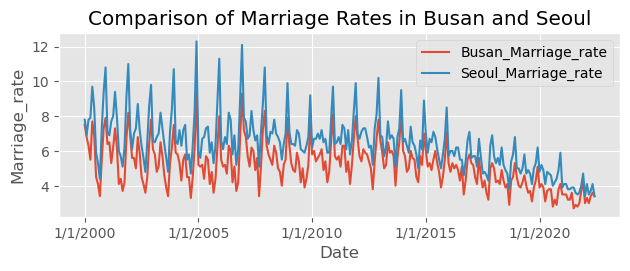

In [59]:
# Seoul VS Busan

plt.subplot(2, 1, 2)

sns.lineplot(data=df[df.Region == 'Busan'], x='Date', y='Marriage_rate', label='Busan_Marriage_rate')
sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Marriage_rate', label='Seoul_Marriage_rate')
plt.title('Comparison of Marriage Rates in Busan and Seoul')
plt.ylabel('Marriage_rate')

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()


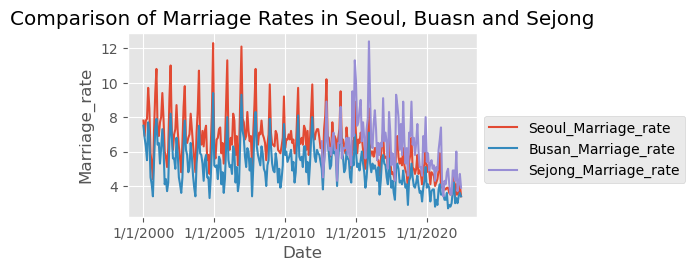

In [63]:
#Seoul VS Busan VS Sejong

plt.subplot(2, 1, 2)

sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Marriage_rate', label='Seoul_Marriage_rate')
sns.lineplot(data=df[df.Region == 'Busan'], x='Date', y='Marriage_rate', label='Busan_Marriage_rate')
sns.lineplot(data=df[df.Region == 'Sejong'], x='Date', y='Marriage_rate', label='Sejong_Marriage_rate')
plt.title('Comparison of Marriage Rates in Seoul, Buasn and Sejong')
plt.ylabel('Marriage_rate')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

plt.xticks(rotation=0, size=10)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()

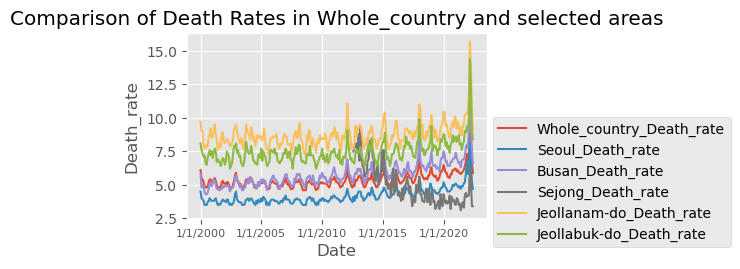

In [65]:
# SK VS Seoul VS Busan VS Sejong


plt.subplot(2, 1, 2)

sns.lineplot(data=sk, x='Date', y='Death_rate', label='Whole_country_Death_rate')
sns.lineplot(data=df[df.Region == 'Seoul'], x='Date', y='Death_rate', label='Seoul_Death_rate')
sns.lineplot(data=df[df.Region == 'Busan'], x='Date', y='Death_rate', label='Busan_Death_rate')
sns.lineplot(data=df[df.Region == 'Sejong'], x='Date', y='Death_rate', label='Sejong_Death_rate')
sns.lineplot(data=df[df.Region == 'Jeollanam-do'], x='Date', y='Death_rate', label='Jeollanam-do_Death_rate')
sns.lineplot(data=df[df.Region == 'Jeollabuk-do'], x='Date', y='Death_rate', label='Jeollabuk-do_Death_rate')
plt.title('Comparison of Death Rates in Whole_country and selected areas')
plt.ylabel('Death_rate')
plt.legend(bbox_to_anchor=(1.02, 0.55), loc='upper left', borderaxespad=0)

plt.xticks(rotation=0, size=8)
plt.xticks(['1/1/2000', '1/1/2005','1/1/2010', '1/1/2015','1/1/2020'])
plt.grid(True, axis='y')

plt.tight_layout()
plt.show()
